## 1. Given a set of blue points, calculate the parameters of the fitted quadratic curve using the gradient descent method.

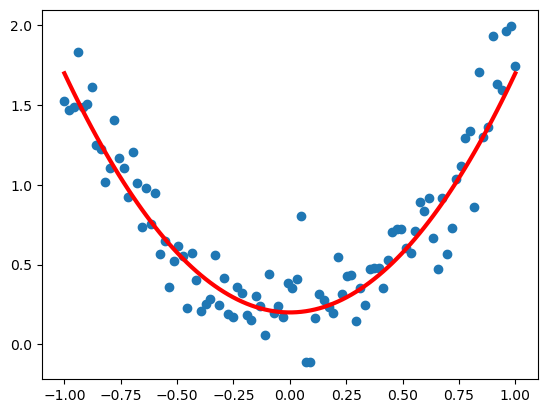

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
y = 1.5*x*x + 0.2 + + 0.2*np.random.randn(100)
plt.scatter(x, y)
plt.plot(x, 1.5*x*x + 0.2, 'r-', lw=3)
plt.show()

In [2]:
import numpy as np

def gradient_descent(X, y, alpha, iterations):
    """
    Gradient Descent for fitting a quadratic curve
    The quadratic curve is of the form: y = ax^2 + bx + c
    """
    m = len(y)  # number of data points
    a, b, c = 0, 0, 0  # initial parameters

    # Gradient Descent
    for i in range(iterations):
        if i%1000 == 0:
            print("Iteration: ", i)
            print("Fitted parameters: a =", a, ", b =", b, ", c =", c)

        # Predictions with the current parameters
        y_pred = a * X**2 + b * X + c

        # Gradients of Loss function w.r.t parameters
        da = -(2/m) * np.sum(X**2 * (y - y_pred))
        db = -(2/m) * np.sum(X * (y - y_pred))
        dc = -(2/m) * np.sum(y - y_pred)

        # Update parameters
        a -= alpha * da
        b -= alpha * db
        c -= alpha * dc

    return a, b, c

# Parameters for Gradient Descent
alpha = 0.01  # learning rate
iterations = 10000  # number of iterations

# Perform Gradient Descent
a, b, c = gradient_descent(x, y, alpha, iterations)

print("Final Fitted parameters: a =", a, ", b =", b, ", c =", c)

Iteration:  0
Fitted parameters: a = 0 , b = 0 , c = 0
Iteration:  1000
Fitted parameters: a = 1.3274542959021298 , b = 0.04633752243076812 , c = 0.29515327079853965
Iteration:  2000
Fitted parameters: a = 1.5343618148680005 , b = 0.04638787884279693 , c = 0.21849401366923038
Iteration:  3000
Fitted parameters: a = 1.5743317384940227 , b = 0.04638793356666002 , c = 0.2036851528214791
Iteration:  4000
Fitted parameters: a = 1.582053037376289 , b = 0.046387933626130126 , c = 0.20082441078501095
Iteration:  5000
Fitted parameters: a = 1.5835446203221857 , b = 0.04638793362619431 , c = 0.20027177914890065
Iteration:  6000
Fitted parameters: a = 1.583832760921117 , b = 0.04638793362619434 , c = 0.20016502302712014
Iteration:  7000
Fitted parameters: a = 1.5838884232662669 , b = 0.04638793362619434 , c = 0.20014440012247084
Iteration:  8000
Fitted parameters: a = 1.5838991759914283 , b = 0.04638793362619434 , c = 0.2001404162366837
Iteration:  9000
Fitted parameters: a = 1.5839012531784018 ,

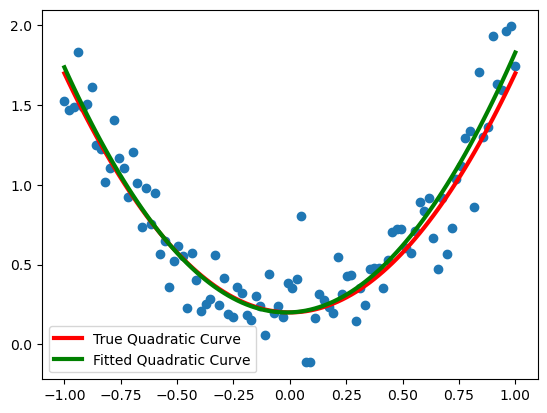

In [3]:
# plot the fitted curve, initial curve, initial data points
y_pred = a * x**2 + b * x + c
plt.scatter(x, y)
plt.plot(x, 1.5*x*x + 0.2, 'r-', lw=3, label='True Quadratic Curve')
plt.plot(x, y_pred, 'g-', lw=3, label='Fitted Quadratic Curve')
plt.legend()
plt.show()

## 2. 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [4]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       

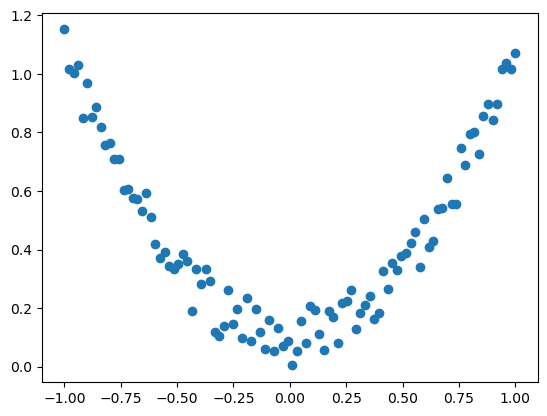

In [5]:
plt.scatter(x.numpy(), y.numpy())

### 2.1 Use Sigmoid as activation function (Cannot be fully fitted)

In [6]:
ACTIVATE_FUNC = 'sigmoid'
assert ACTIVATE_FUNC in ['sigmoid', 'relu']
class Net(torch.nn.Module):
    # 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden, bias=True)
        self.predict = torch.nn.Linear(n_hidden, n_output, bias=True)
        self.activate_func = torch.nn.Sigmoid() if ACTIVATE_FUNC == 'sigmoid' else torch.nn.ReLU()
    def forward(self, x):
        x = self.hidden(x)
        x = self.activate_func(x)
        x = self.predict(x)
        x = self.activate_func(x)
        return x

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
  (activate_func): Sigmoid()
)


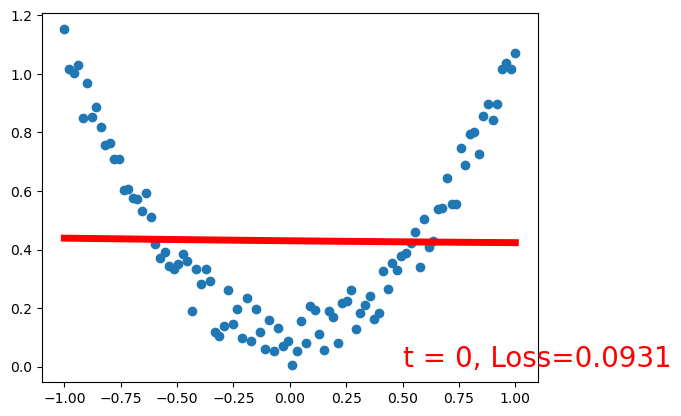

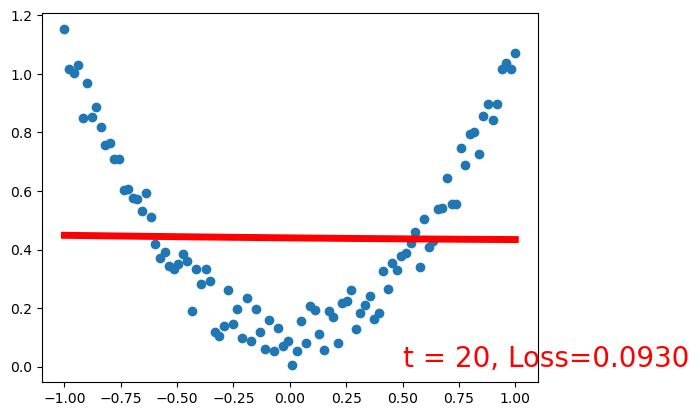

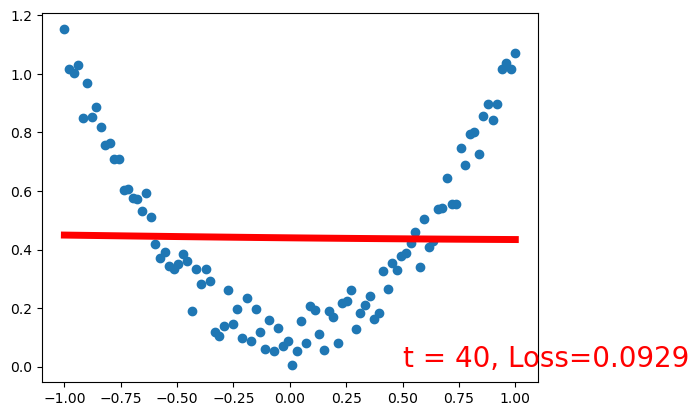

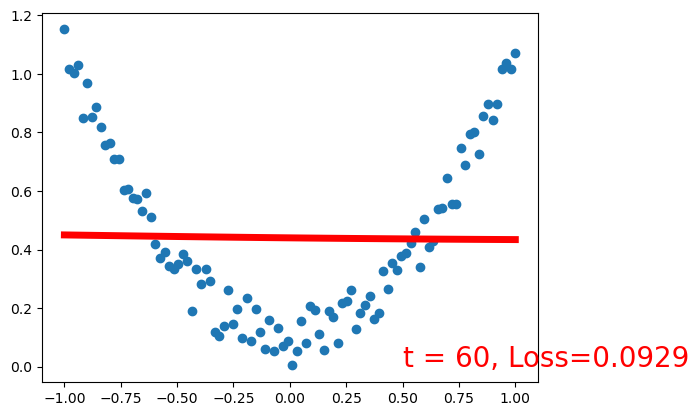

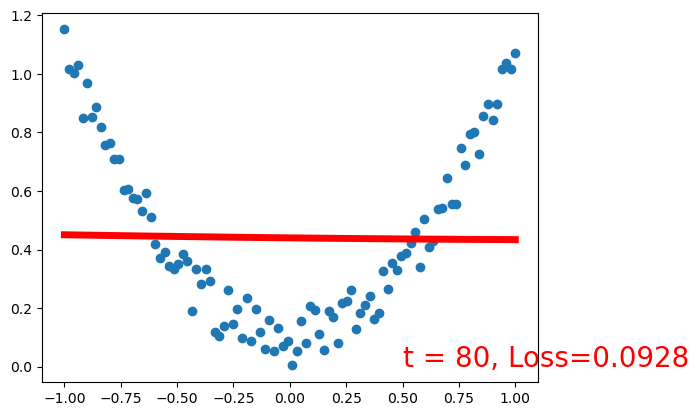

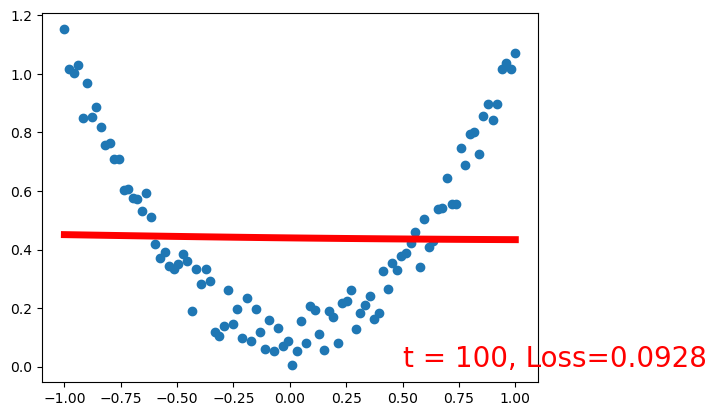

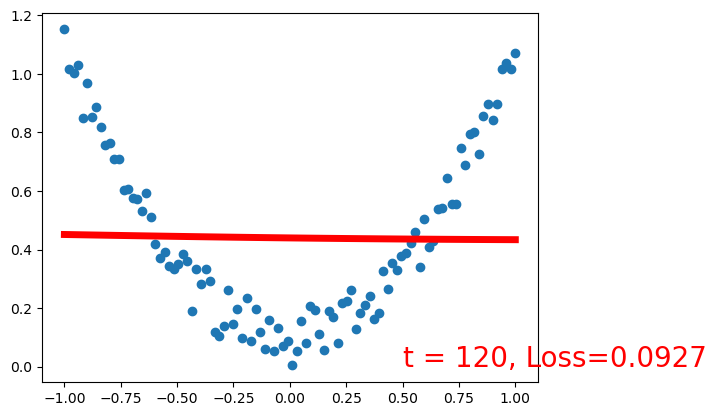

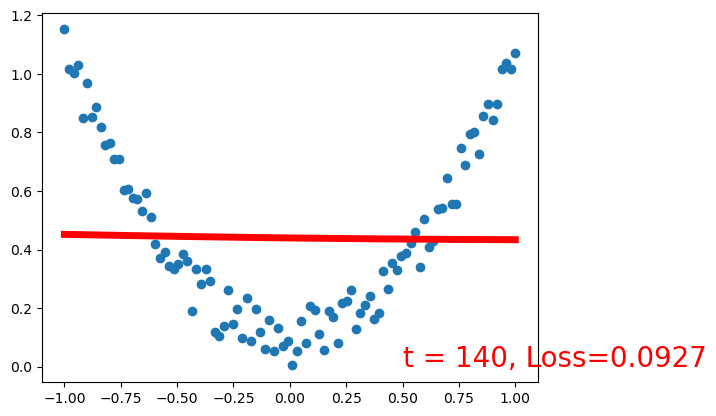

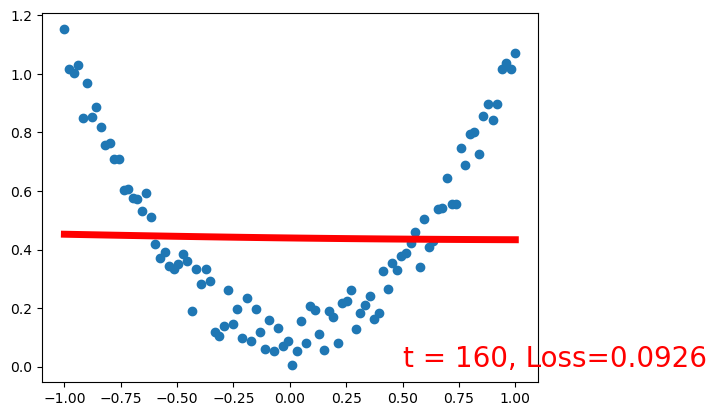

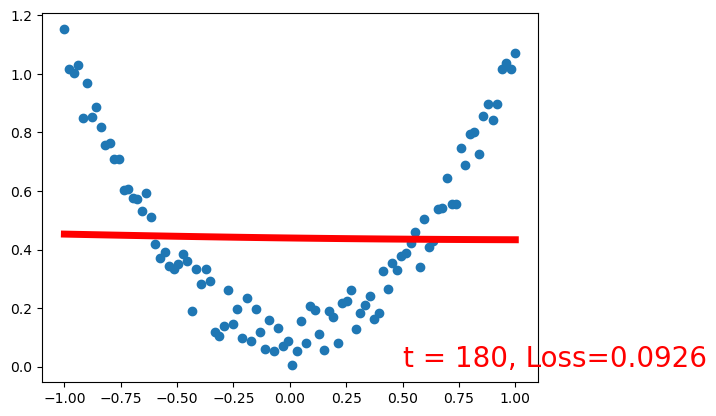

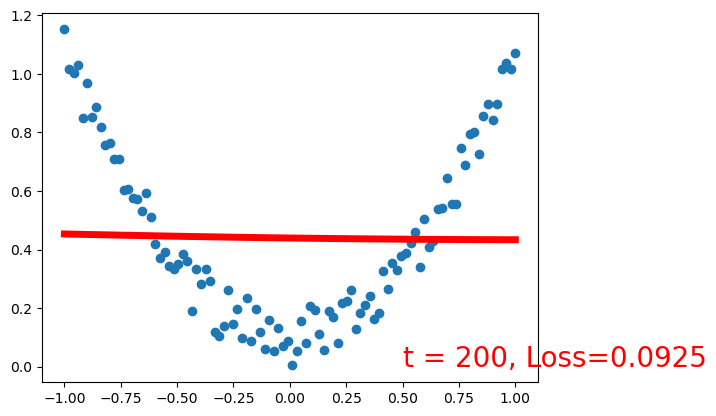

In [7]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

### 2.2 Use Relu as activation function (The fitting effect is good)

In [8]:
ACTIVATE_FUNC = 'relu'
assert ACTIVATE_FUNC in ['sigmoid', 'relu']
class Net(torch.nn.Module):
    # 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden, bias=True)
        self.predict = torch.nn.Linear(n_hidden, n_output, bias=True)
        self.activate_func = torch.nn.Sigmoid() if ACTIVATE_FUNC == 'sigmoid' else torch.nn.ReLU()
    def forward(self, x):
        x = self.hidden(x)
        x = self.activate_func(x)
        x = self.predict(x)
        x = self.activate_func(x)
        return x

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
  (activate_func): ReLU()
)


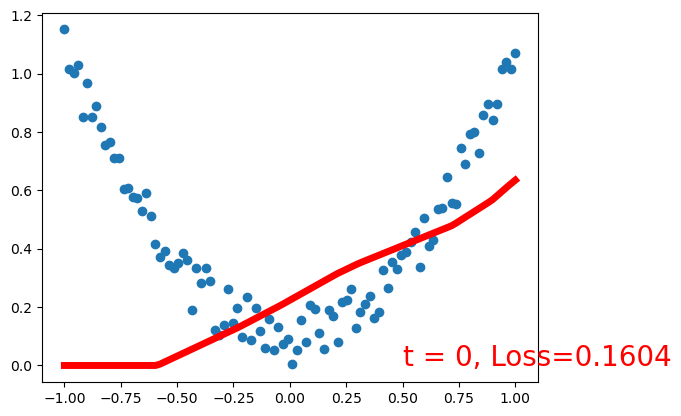

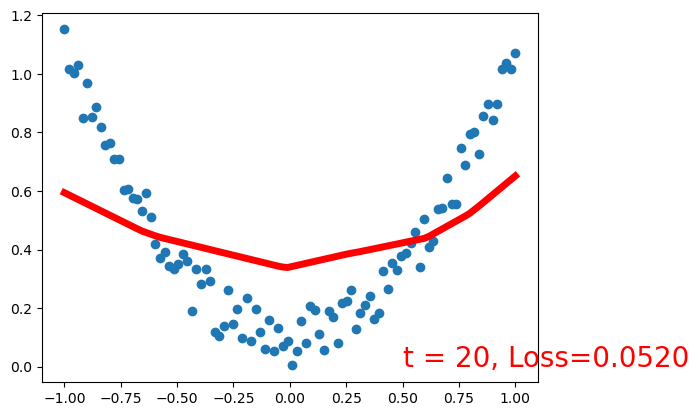

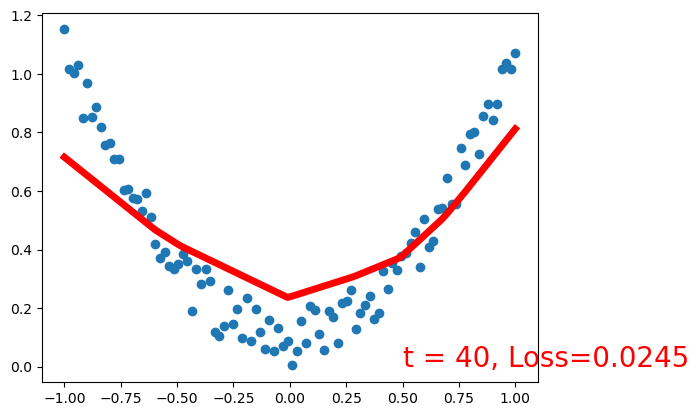

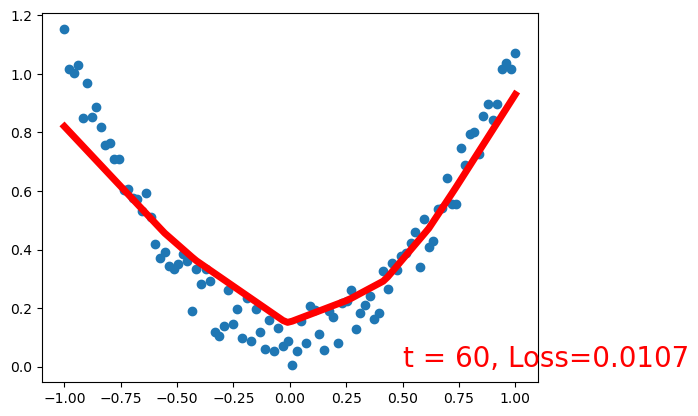

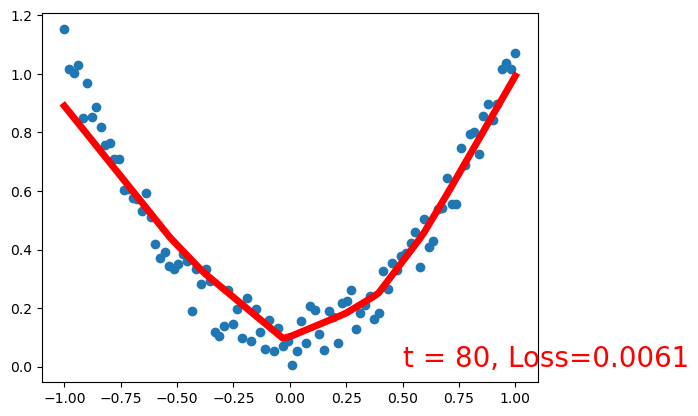

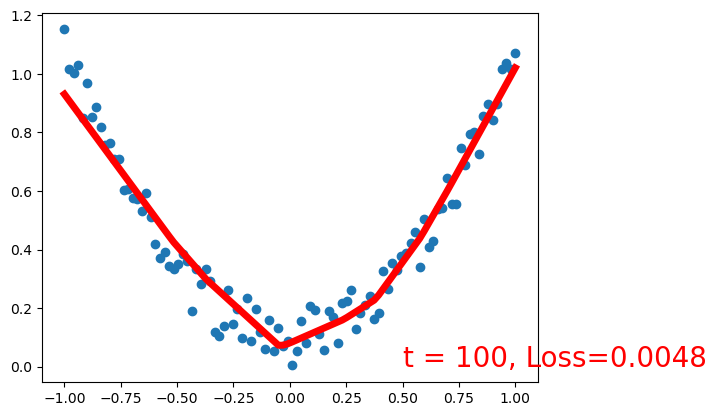

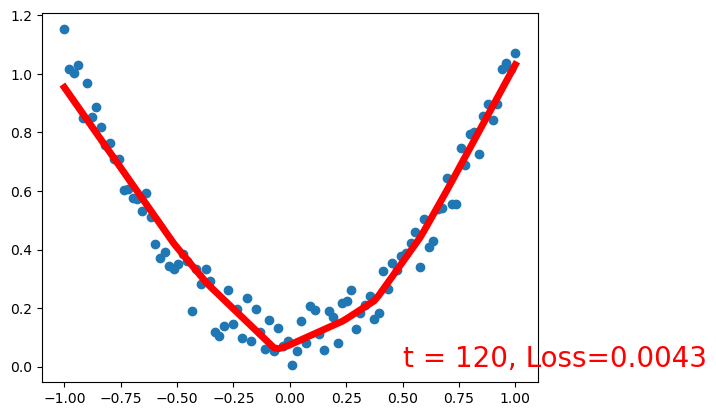

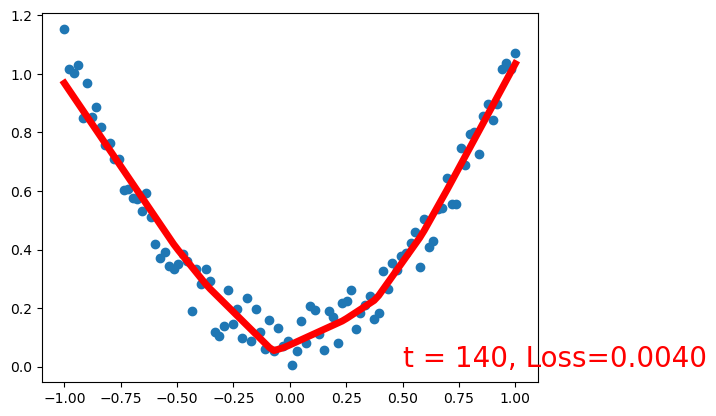

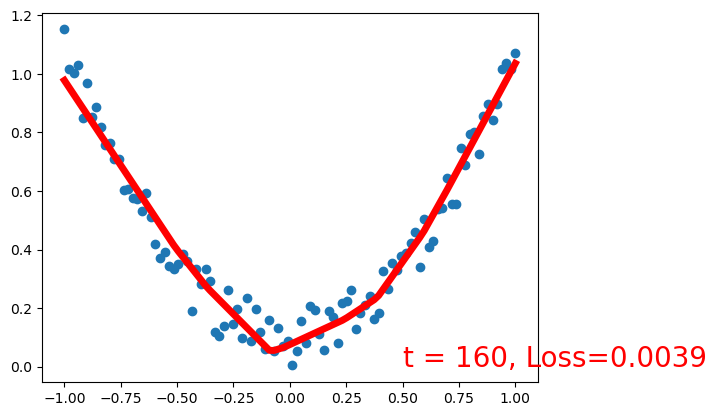

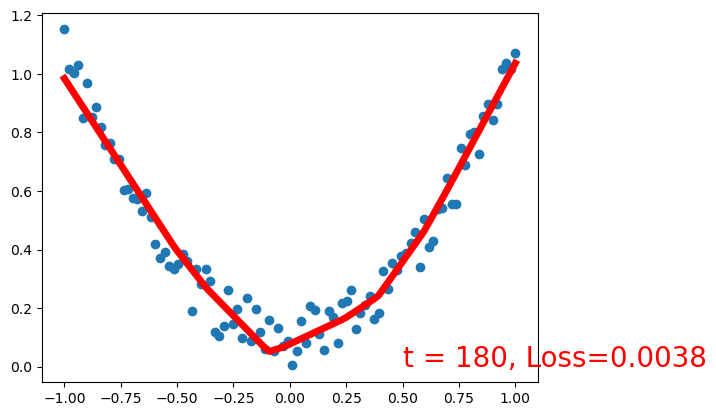

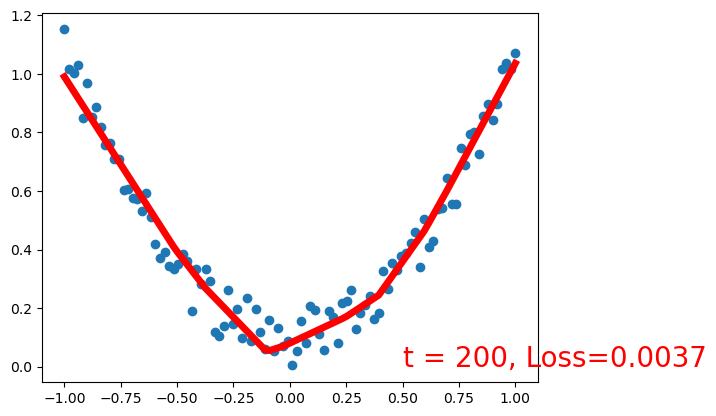

In [9]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()